In [19]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def apply_fir_comb_filter(data, delay_samples, gain):
    """Apply an FIR comb filter to the data."""
    output = np.zeros_like(data)
    for i in range(len(data)):
        output[i] = data[i]
        if i - delay_samples >= 0:
            output[i] += gain * data[i - delay_samples]
    return output

def apply_iir_comb_filter(data, delay_samples, gain):
    """Apply an IIR comb filter to the data."""
    output = np.zeros_like(data)
    for i in range(len(data)):
        output[i] = data[i]
        if i - delay_samples >= 0:
            output[i] += gain * output[i - delay_samples]
    return output

fs, data = wavfile.read('ohyeah.wav')
if data.dtype == np.int16:
    data = data.astype(np.float32) / np.iinfo(np.int16).max
elif data.dtype == np.int32:
    data = data.astype(np.float32) / np.iinfo(np.int32).max

if len(data.shape) > 1:
    data = data[:, 0]

delay_ms = 500  
delay_samples = int(delay_ms * fs / 1000)  
gain = 1.0

fir_output = apply_fir_comb_filter(data, delay_samples, gain)
iir_output = apply_iir_comb_filter(data, delay_samples, gain)

fs_fir, pre_filtered_fir = wavfile.read('ohyeah_fir_1.0_0.5.wav')
if pre_filtered_fir.dtype == np.int16:
    pre_filtered_fir = pre_filtered_fir.astype(np.float32) / np.iinfo(np.int16).max
elif pre_filtered_fir.dtype == np.int32:
    pre_filtered_fir = pre_filtered_fir.astype(np.float32) / np.iinfo(np.int32).max
if len(pre_filtered_fir.shape) > 1:
    pre_filtered_fir = pre_filtered_fir[:, 0]

fs_iir, pre_filtered_iir = wavfile.read('ohyeah_iir_1.0_0.5.wav')
if pre_filtered_iir.dtype == np.int16:
    pre_filtered_iir = pre_filtered_iir.astype(np.float32) / np.iinfo(np.int16).max
elif pre_filtered_iir.dtype == np.int32:
    pre_filtered_iir = pre_filtered_iir.astype(np.float32) / np.iinfo(np.int32).max
if len(pre_filtered_iir.shape) > 1:
    pre_filtered_iir = pre_filtered_iir[:, 0]

mse_fir = np.mean((fir_output - pre_filtered_fir)**2)
mse_iir = np.mean((iir_output - pre_filtered_iir)**2)





/var/folders/qz/tdx4m00s7kjbwb7x7ts61f5m0000gn/T/ipykernel_59494/1279189759.py:23: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('ohyeah.wav')


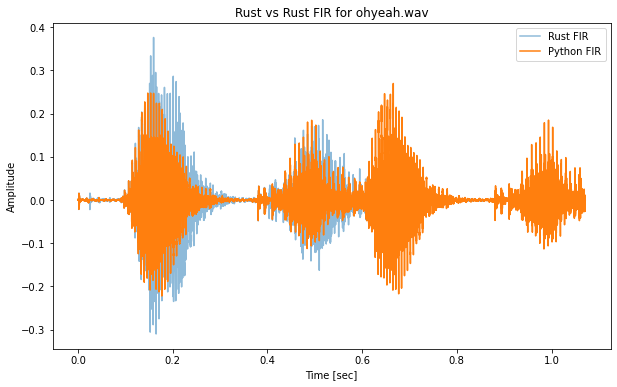

In [20]:
plt.figure(figsize=(10, 6))
t = np.arange(len(data)) / fs
plt.plot(t, pre_filtered_fir, label='Rust FIR', alpha=0.5)
plt.plot(t, fir_output, label='Python FIR')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Rust vs Rust FIR for ohyeah.wav')
plt.legend()
plt.show()

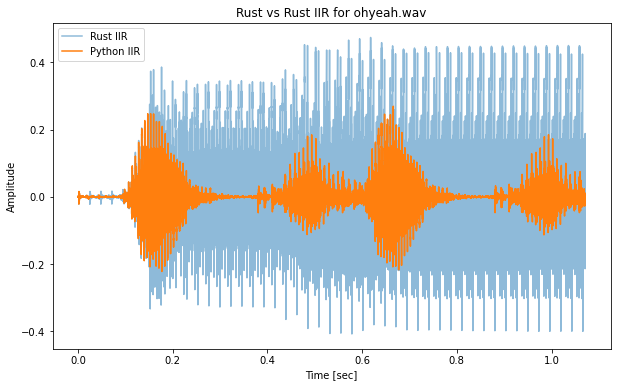

In [21]:
plt.figure(figsize=(10, 6))
t = np.arange(len(data)) / fs
plt.plot(t, pre_filtered_iir, label='Rust IIR', alpha=0.5)
plt.plot(t, iir_output, label='Python IIR')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Rust vs Rust IIR for ohyeah.wav')
plt.legend()
plt.show()

sweep.wav

In [16]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def apply_fir_comb_filter(data, delay_samples, gain):
    """Apply an FIR comb filter to the data."""
    output = np.zeros_like(data)
    for i in range(len(data)):
        output[i] = data[i]
        if i - delay_samples >= 0:
            output[i] += gain * data[i - delay_samples]
    return output

def apply_iir_comb_filter(data, delay_samples, gain):
    """Apply an IIR comb filter to the data."""
    output = np.zeros_like(data)
    for i in range(len(data)):
        output[i] = data[i]
        if i - delay_samples >= 0:
            output[i] += gain * output[i - delay_samples]
    return output


fs, data = wavfile.read('sweep.wav')

if data.dtype == np.int16:
    data = data.astype(np.float32) / np.iinfo(np.int16).max
elif data.dtype == np.int32:
    data = data.astype(np.float32) / np.iinfo(np.int32).max

if len(data.shape) > 1:
    data = data[:, 0]

delay_ms = 500  
delay_samples = int(delay_ms * fs / 1000)  
gain = 1.0

fir_output = apply_fir_comb_filter(data, delay_samples, gain)
iir_output = apply_iir_comb_filter(data, delay_samples, gain)

fs_fir, pre_filtered_fir = wavfile.read('sweep_fir_1.0_0.5.wav')
if pre_filtered_fir.dtype == np.int16:
    pre_filtered_fir = pre_filtered_fir.astype(np.float32) / np.iinfo(np.int16).max
elif pre_filtered_fir.dtype == np.int32:
    pre_filtered_fir = pre_filtered_fir.astype(np.float32) / np.iinfo(np.int32).max
if len(pre_filtered_fir.shape) > 1:
    pre_filtered_fir = pre_filtered_fir[:, 0]

fs_iir, pre_filtered_iir = wavfile.read('sweep_iir_1.0_0.5.wav')
if pre_filtered_iir.dtype == np.int16:
    pre_filtered_iir = pre_filtered_iir.astype(np.float32) / np.iinfo(np.int16).max
elif pre_filtered_iir.dtype == np.int32:
    pre_filtered_iir = pre_filtered_iir.astype(np.float32) / np.iinfo(np.int32).max
if len(pre_filtered_iir.shape) > 1:
    pre_filtered_iir = pre_filtered_iir[:, 0]

mse_fir = np.mean((fir_output - pre_filtered_fir)**2)
mse_iir = np.mean((iir_output - pre_filtered_iir)**2)





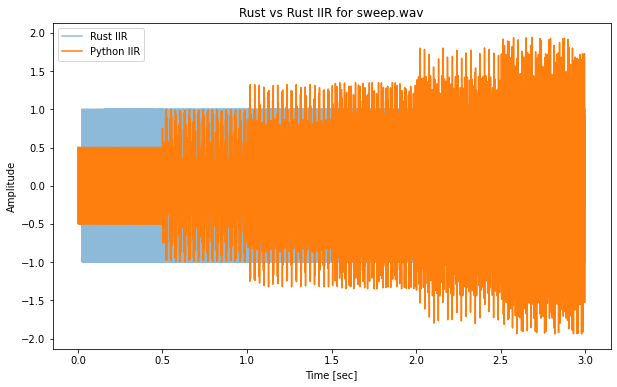

In [17]:
plt.figure(figsize=(10, 6))
t = np.arange(len(data)) / fs
plt.plot(t, pre_filtered_iir, label='Rust IIR', alpha=0.5)
plt.plot(t, iir_output, label='Python IIR')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Rust vs Rust IIR for sweep.wav')
plt.legend()
plt.show()

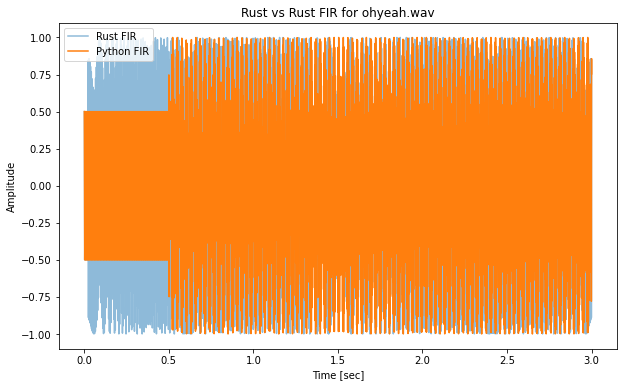

In [18]:
plt.figure(figsize=(10, 6))
t = np.arange(len(data)) / fs
plt.plot(t, pre_filtered_fir, label='Rust FIR', alpha=0.5)
plt.plot(t, fir_output, label='Python FIR')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Rust vs Rust FIR for ohyeah.wav')
plt.legend()
plt.show()